In [1]:
import numpy as np
import pandas as pd

In [2]:
 pip install -U scikit-learn scipy matplotlib


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 991.0 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.2 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.2 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.2 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.2 MB 4.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.2 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/9.2 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.2 MB 5.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.2 MB 5.2 MB/s eta 0:00:02
   ---------- ------------

In [3]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_348\3717026788.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('DrDoS_LDAP_new.csv')


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [5]:
df1.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',

In [6]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [7]:
l = []
for col in df1:
    
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [8]:
df1.drop(l, axis=1, inplace=True)

In [9]:
df1.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
0,0,0,0,9141643,85894,28,0.0,0.0,0.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841445
1,900,1808,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841435
2,900,58766,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841431
3,900,35228,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841422
4,900,44969,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841419


In [10]:
import matplotlib.pyplot as plt

In [11]:
no = df1[df1[' Label'] == 0]
yes = df1[df1[' Label'] == 1]
print(len(no), len(yes))

1612 2179930


In [12]:
# from sklearn.utils import resample

# # no = df1[df1[' Label'] == 0]
# # yes = df1[df1[' Label'] == 1]
# no_oversampled = resample(no, replace=True, n_samples=len(yes), random_state=123)
# df1 = pd.concat([yes, no_oversampled])


# fig = plt.figure(figsize = (8,5))
# df1[' Label'].value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)

In [13]:
# no = df1[df1[' Label'] == 0]
# yes = df1[df1[' Label'] == 1]
# print(len(no), len(yes))
# len(df1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [14]:
print(len(df1))
df1.sample(10)

2142892


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
1263128,519,9567,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-122.268719
593073,560,13670,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-125.238192
618233,856,20862,17,1,2,0,2928.0,0.0,1464.0,0.0,...,1,172,16,0,5,192,168,50,1,-125.113909
1486537,884,39158,17,52,4,0,5888.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.228365
1301847,900,52987,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-122.090853
923637,917,35153,17,47,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-123.797173
1648484,818,22238,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-120.488685
422757,578,45962,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-125.979577
1042754,649,28315,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-123.269294
511368,890,30770,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-125.585750


In [17]:
# X = df1.drop(columns = ' Label', axis=1)
# Y = df1[' Label']

In [18]:
# print(X)
# Y

In [19]:
# scaler = StandardScaler()
# scaler.fit(X)
# standardized_data = scaler.transform(X)
# print(standardized_data)

In [20]:
# print(X)
# Y

In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

In [22]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, stratify=Y, random_state=2)

In [23]:
# model = LogisticRegression()

In [24]:
# model.fit(X_train, Y_train)
# from sklearn.metrics import accuracy_score
# X_train_prediction = model.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# print('Accuracy on Training data : ', training_data_accuracy)
# X_test_prediction = model.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# print('Accuracy on Test data : ', test_data_accuracy)

In [16]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.6 kB 2.6 MB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.6 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

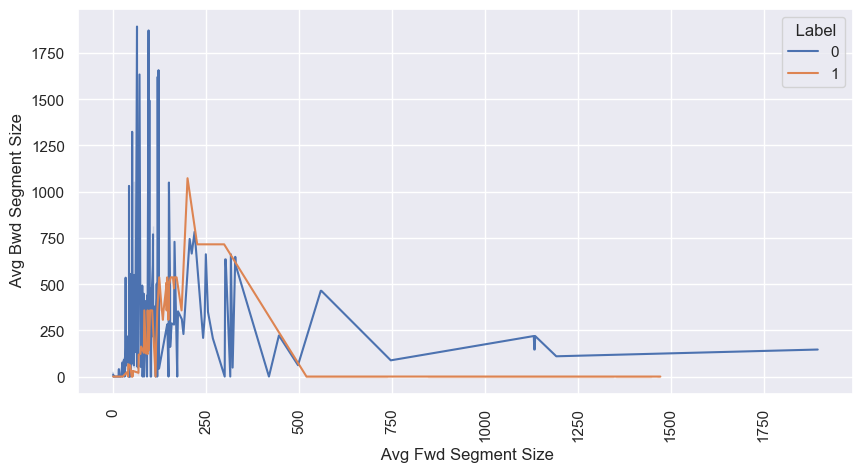

In [19]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df1[' Avg Fwd Segment Size'], y = df1[' Avg Bwd Segment Size'], hue = df1[' Label']);

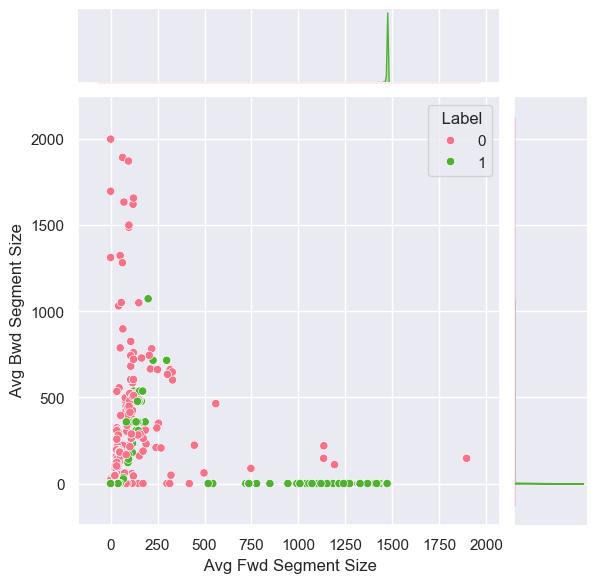

In [25]:
sns.jointplot(x = ' Avg Fwd Segment Size', y = ' Avg Bwd Segment Size', hue = ' Label',
                data = df1, palette = [sns.color_palette("husl", 9)[0],
                                      sns.color_palette("husl", 9)[3]]);

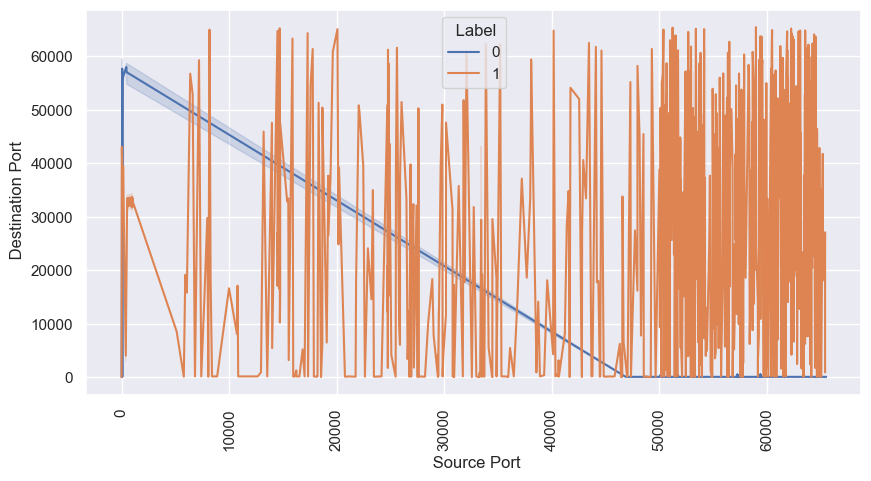

In [20]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df1[' Source Port'], y = df1[' Destination Port'], hue = df1[' Label']);

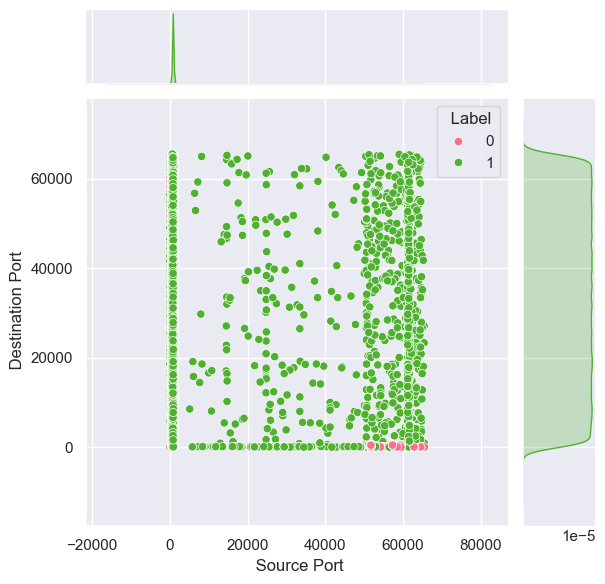

In [24]:
sns.jointplot(x = ' Source Port', y = ' Destination Port', hue = ' Label',
                data = df1, palette = [sns.color_palette("husl", 9)[0],
                                      sns.color_palette("husl", 9)[3]]);
     


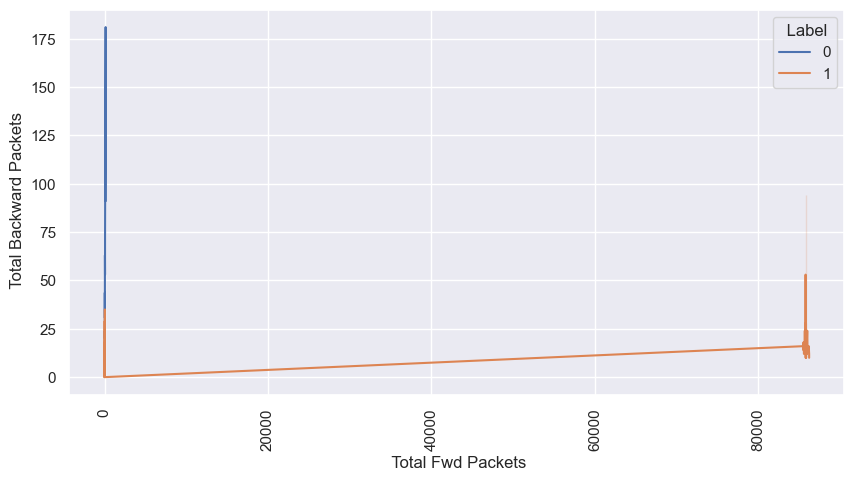

In [21]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df1[' Total Fwd Packets'], y = df1[' Total Backward Packets'], hue = df1[' Label']);

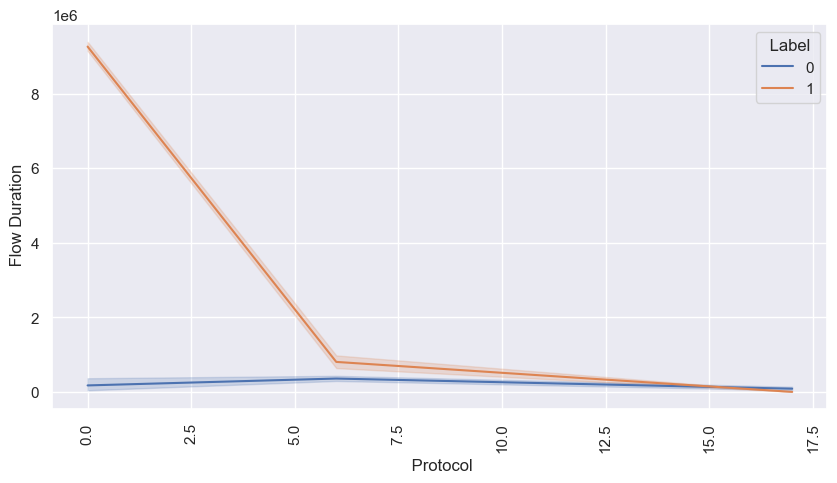

In [22]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df1[' Protocol'], y = df1[' Flow Duration'], hue = df1[' Label']);

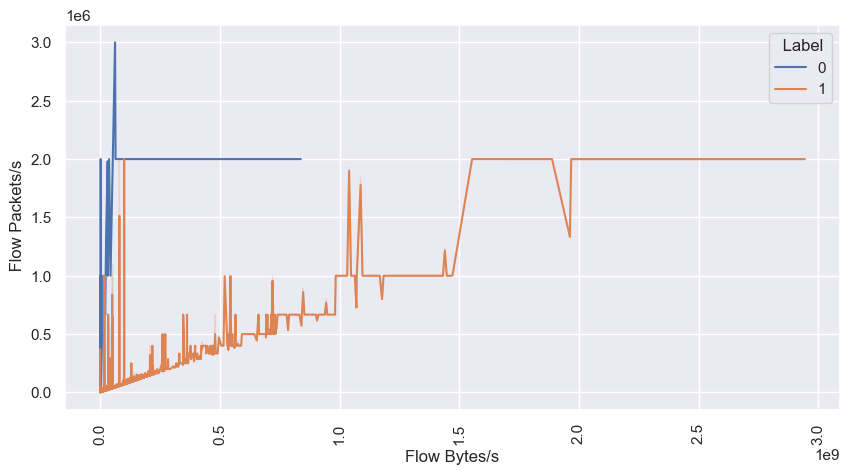

In [23]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df1['Flow Bytes/s'], y = df1[' Flow Packets/s'], hue = df1[' Label']);

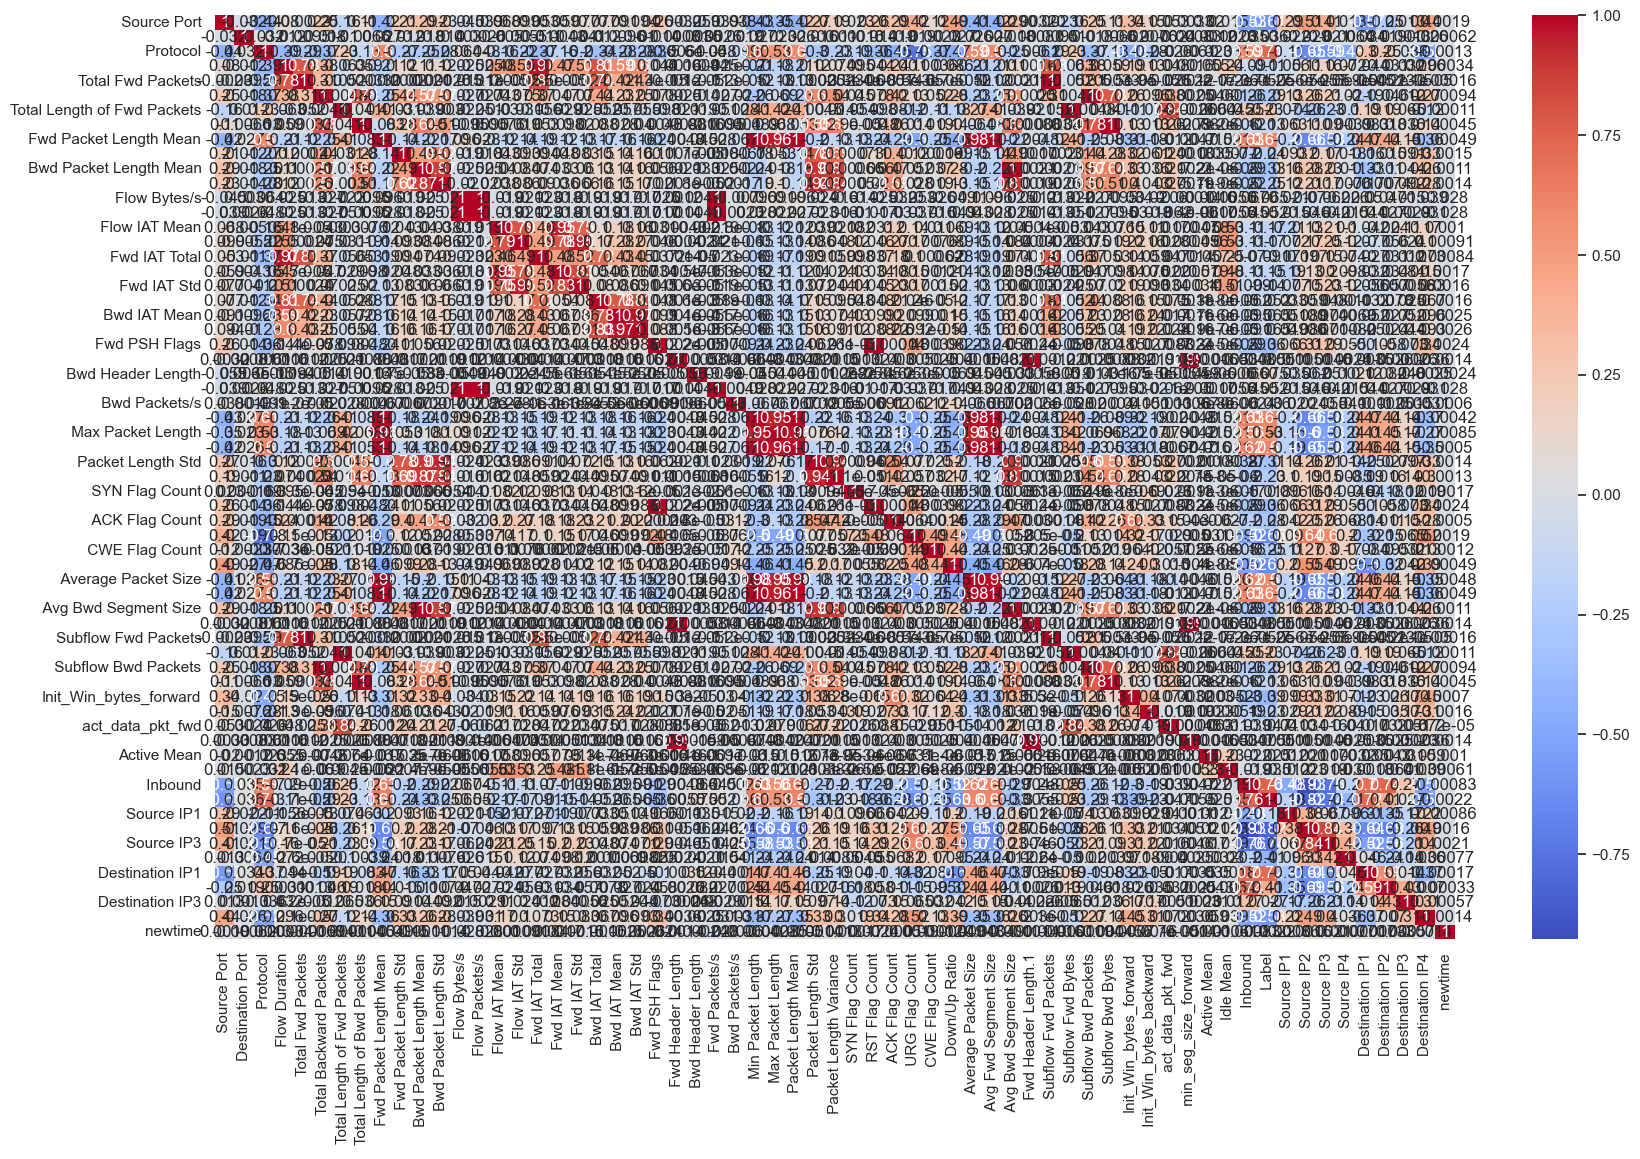

In [27]:
fig = plt.gcf()
fig.set_size_inches((20, 12));



sns.heatmap(df1.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

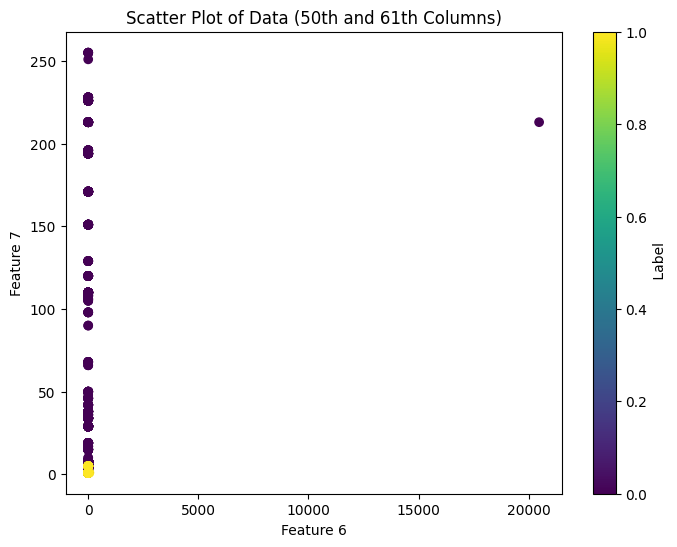

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Extract the 6th and 7th columns (indices 5 and 6)
col_6 = df1.iloc[:, 50]
col_7 = df1.iloc[:, 61]

# Create a scatter plot using the 6th and 7th columns
plt.figure(figsize=(8, 6))
plt.scatter(col_6, col_7, c=df1[' Label'], cmap='viridis', marker='o')
plt.xlabel('Feature 6')
plt.ylabel('Feature 7')
plt.colorbar(label=' Label')
plt.title('Scatter Plot of Data (50th and 61th Columns)')
plt.show()



In [26]:
no = df1[df1[' Label'] == 0]
yes = df1[df1[' Label'] == 1]
print(len(no), len(yes))

1592 2141300


In [27]:
# X = df1.drop(columns = ' Label', axis=1)
# y = df1[' Label']

In [28]:
# print(X)
# y

In [12]:
import pandas as pd
import numpy as np
from sklearn.utils import resample


majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]


minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)

majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)

balanced_df = pd.concat([minority_upsampled, majority_downsampled])

balanced_df = balanced_df.sample(frac=1, random_state=42)

In [13]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))

50000 50000


In [14]:
X = balanced_df.drop(columns = ' Label', axis=1)
Y = balanced_df[' Label']

In [15]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.79583826 -0.3707941   0.73963593 ...  0.02201011 -0.45110201
   1.16697591]
 [-0.79406995  0.9297517   0.73963593 ...  0.02201011 -0.45110201
   0.51448844]
 [ 1.15164771 -0.88293156  0.73963593 ... -0.85503664 -0.32946204
   1.0254988 ]
 ...
 [-0.78331574 -0.28832387  0.73963593 ...  0.02201011 -0.45110201
  -0.57400487]
 [-0.80301976  1.71155717 -1.17214735 ...  0.02201011 -0.32946204
  -0.73177561]
 [ 1.32486985 -0.8658778  -1.17214735 ... -0.79239045  0.26136068
   1.58415684]]


In [33]:
# print(X)
# Y

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, stratify=Y, random_state=2)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.99922
Accuracy on Test data :  0.9995


C:\Users\User\miniconda3\envs\tf\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [39]:
# confusion = confusion_matrix(Y_test, X_test_prediction)

In [40]:
# confusion

In [41]:
# recall = recall_score(Y_test, X_test_prediction)
# f1 = f1_score(Y_test, X_test_prediction)
# print(recall, f1)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [44]:
X = df1.drop(' Label', axis=1)  
y = df1[' Label']

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [47]:
explained_variance_ratio = pca.explained_variance_ratio_

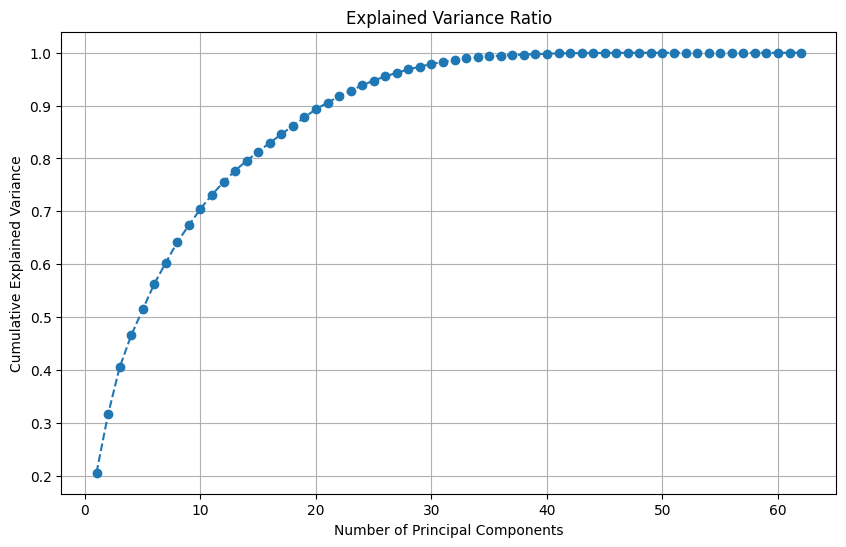

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [56]:
eigenvalues = pca.explained_variance_
eigenvalues = np.round(eigenvalues,5)
print("Eigenvalues:")
print(len(eigenvalues))
print(eigenvalues.tolist())

Eigenvalues:
62
[12.75801, 6.8412, 5.49742, 3.75452, 3.047, 2.99067, 2.49906, 2.42245, 1.96252, 1.92308, 1.66995, 1.46759, 1.3484, 1.1533, 1.06674, 1.03458, 0.99892, 0.99706, 0.98802, 0.9667, 0.75772, 0.7334, 0.66979, 0.63404, 0.55966, 0.47841, 0.42629, 0.39465, 0.33597, 0.29934, 0.25245, 0.20546, 0.19514, 0.14521, 0.11175, 0.07113, 0.0637, 0.05599, 0.0534, 0.04984, 0.04106, 0.02061, 0.01365, 0.01117, 0.00899, 0.0079, 0.00648, 0.00598, 0.00177, 0.00095, 0.00072, 0.00018, 5e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [50]:
principal_components = pca.components_
print("Principal Components (Loadings):")
print(principal_components)

Principal Components (Loadings):
[[ 1.60156290e-01 -1.06878541e-02 -2.19729780e-01 ... -1.86089973e-02
   1.55772983e-01  2.33403229e-04]
 [-2.89480677e-02  1.33509994e-03  4.47652728e-02 ...  8.80185991e-02
   7.89491940e-03 -8.27147696e-04]
 [-7.95759429e-02  1.96378687e-03 -4.73782488e-02 ...  3.34242599e-02
  -5.66011476e-02  8.99382678e-05]
 ...
 [ 0.00000000e+00  5.63150788e-17  3.06334568e-16 ... -1.11022302e-16
  -5.55111512e-17 -1.66533454e-16]
 [-0.00000000e+00  1.99836774e-17  6.24842289e-17 ...  1.66533454e-16
   4.77048956e-18 -1.90385901e-16]
 [-0.00000000e+00  1.84114061e-16  3.94522417e-16 ...  2.77555756e-17
   6.24500451e-17  8.67361738e-17]]


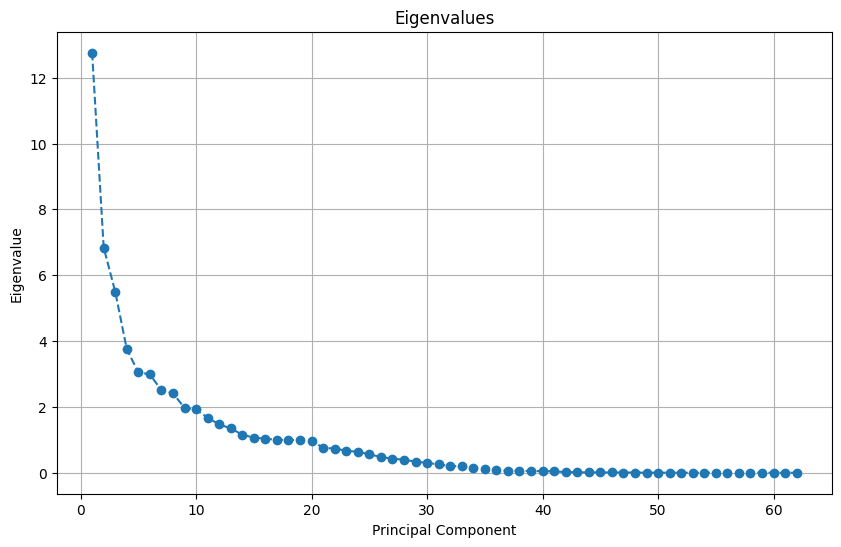

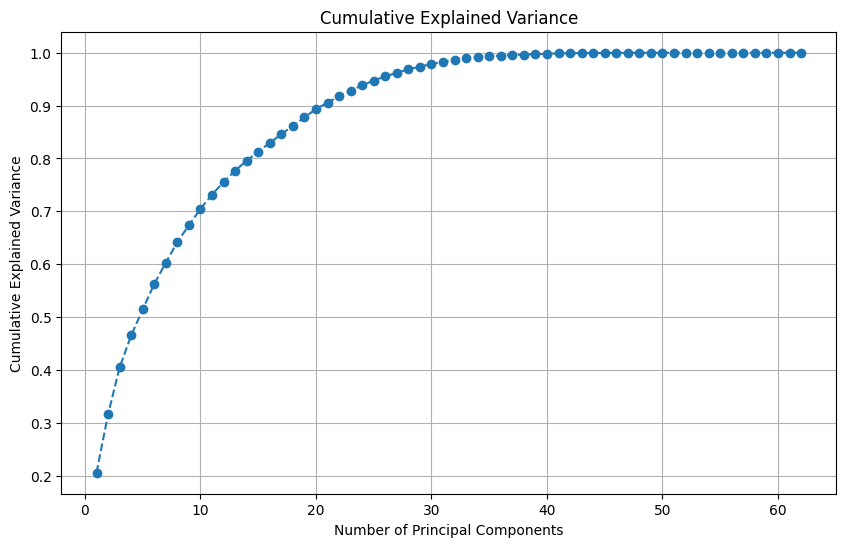

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

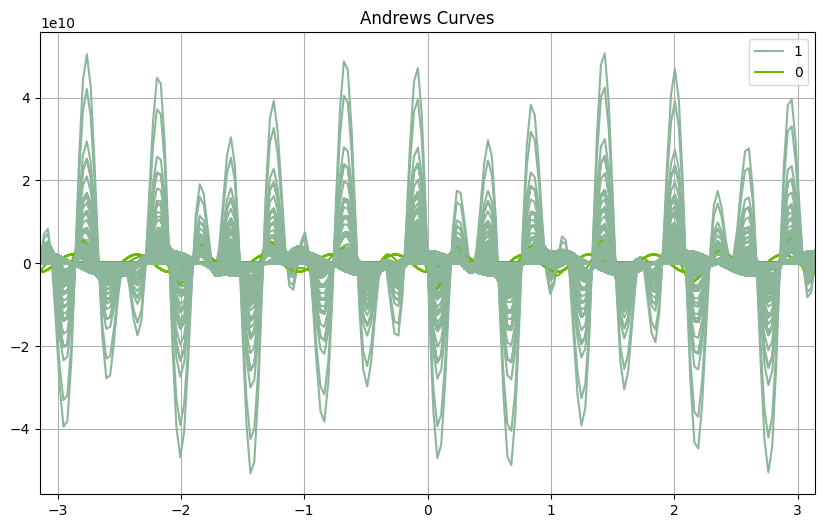

In [61]:
class_column = ' Label'

# Create the Andrews curves plot
plt.figure(figsize=(10, 6))
andrews_curves(df1, class_column)
plt.title("Andrews Curves")
plt.show()

# The given graph comes under intermediate Case where we can't say it about it's linearity yet